# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array,load_img
import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
from keras.layers.advanced_activations import LeakyReLU

# Importing the data set and performing data augmentation

In [2]:
train_path = 'C:/Users/devro/PycharmProjects/mynew1/new1/explo_prediction/'
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range = 4,
                                   width_shift_range=0.15,
                                   height_shift_range = 0.2,
                                   shear_range=0.3,
                                   fill_mode='nearest',
                                   validation_split=0.25)
train_set = train_datagen.flow_from_directory(directory=train_path, class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(64,64), batch_size=128, shuffle=True,
                                                    subset ="training")
validation_set = train_datagen.flow_from_directory(directory=train_path,
                                                 target_size = (64,64),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',
                                                 color_mode = 'grayscale',subset="validation",shuffle=True)

Found 10920 images belonging to 18 classes.
Found 3630 images belonging to 18 classes.


# Defing the model 

In [3]:
def make_model():
    model = Sequential()
    model.add(Conv2D(32,input_shape=(64,64,1),kernel_size=(3,3),strides=(1,1),activation='relu'))
    padding="same"
    model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu'))
    padding="same"
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.15))
    

    model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),activation='relu'))
    padding="same"
    model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu'))
    padding="same"
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(18,activation='softmax'))
 
    
    model.compile(
          loss = 'categorical_crossentropy',
          optimizer = 'Adam',metrics = ['accuracy']
                )
    return model 

In [4]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0

# Training the model

In [5]:
h = model.fit(
      train_set,validation_data = validation_set,
                              epochs=20,steps_per_epoch = 64,validation_steps = 48,
                              callbacks = [
                              keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='auto'),
                              keras.callbacks.ModelCheckpoint('explo/model_{val_loss:.3f}.h5',
                              save_best_only = True,save_weights_only=False,
                              monitor='val_loss')
                              ]


)
model.save('explo_model.h5')

Epoch 1/20
64/64 [==============================] - 340s 5s/step - loss: 2.7229 - accuracy: 0.1336 - val_loss: 1.1310 - val_accuracy: 0.6615
Epoch 2/20
64/64 [==============================] - 96s 1s/step - loss: 0.9266 - accuracy: 0.6964 - val_loss: 0.2064 - val_accuracy: 0.9473
Epoch 3/20
64/64 [==============================] - 58s 896ms/step - loss: 0.2545 - accuracy: 0.9151 - val_loss: 0.1222 - val_accuracy: 0.9645
Epoch 4/20
64/64 [==============================] - 52s 806ms/step - loss: 0.1243 - accuracy: 0.9595 - val_loss: 0.0912 - val_accuracy: 0.9779
Epoch 5/20
64/64 [==============================] - 50s 781ms/step - loss: 0.0880 - accuracy: 0.9720 - val_loss: 0.0700 - val_accuracy: 0.9782
Epoch 6/20
64/64 [==============================] - 49s 768ms/step - loss: 0.0764 - accuracy: 0.9757 - val_loss: 0.0474 - val_accuracy: 0.9847
Epoch 7/20
64/64 [==============================] - 50s 787ms/step - loss: 0.0517 - accuracy: 0.9825 - val_loss: 0.0642 - val_accuracy: 0.9840
Epoc

In [6]:
## Loading the saved model
from keras.models import load_model
model = load_model('explo_model.h5')

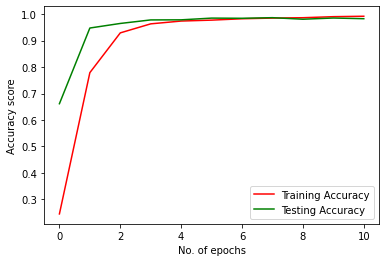

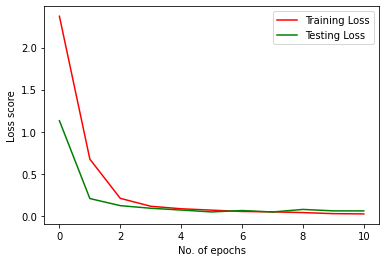

In [10]:
%matplotlib inline
accu= h.history['accuracy']
val_acc=h.history['val_accuracy']
loss=h.history['loss']
val_loss=h.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy score')
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.xlabel('No. of epochs')
plt.ylabel('Loss score')
plt.legend()
plt.show()
		


In [8]:
train_set.class_indices


{'gesture-0': 0,
 'gesture-1': 1,
 'gesture-10': 2,
 'gesture-11': 3,
 'gesture-12': 4,
 'gesture-13': 5,
 'gesture-14': 6,
 'gesture-15': 7,
 'gesture-16': 8,
 'gesture-17': 9,
 'gesture-2': 10,
 'gesture-3': 11,
 'gesture-4': 12,
 'gesture-5': 13,
 'gesture-6': 14,
 'gesture-7': 15,
 'gesture-8': 16,
 'gesture-9': 17}

In [9]:
labels = ['0','1','+','-','*','/','Confirm','**','%','Clear','2','3','4','5','6','7','8','9']
